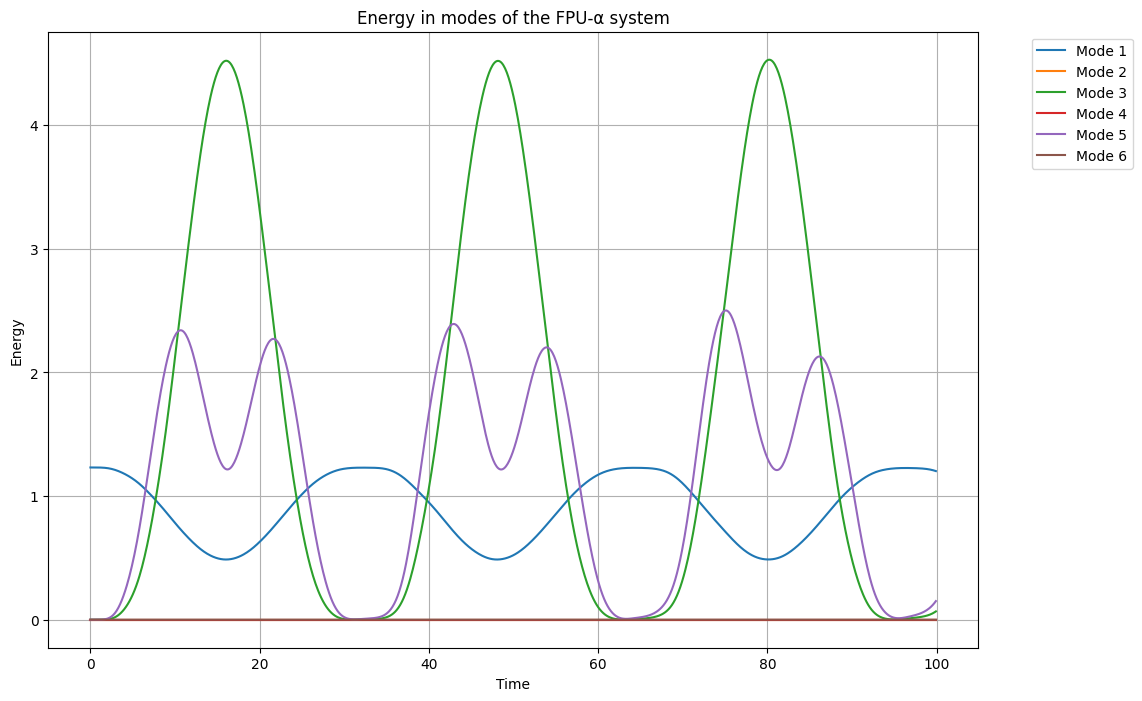

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def fpu_alpha_derivatives(t, y, n, alpha):
    x = y[:n]
    v = y[n:]
    dxdt = v.copy()
    dvdt = np.zeros_like(v)

    # # Calculate accelerations for internal particles
    # for i in range(1, n-1):  # Ignore the first and last particles
    #     left = x[i-1]
    #     right = x[i+1]
    #     dvdt[i] = (left - 2 * x[i] + right) + alpha * ((left - x[i])**2 - (x[i] - right)**2)

    # # The first and last particles remain fixed
    # dvdt[0] = 0
    # dvdt[n-1] = 0
    # dxdt[0] = 0
    # dxdt[n-1] = 0

    # Periodic boundary conditions
    for i in range(n):
        left = x[i-1] if i > 0 else x[-1]
        right = x[i+1] if i < n-1 else x[0]
        dvdt[i] = (left - 2 * x[i] + right) + alpha * ((left - x[i])**2 - (x[i] - right)**2)

    return np.concatenate([dxdt, dvdt])

def calculate_mode_energies(y, n, num_modes):
    x = y[:n]
    v = y[n:]
    energies = np.zeros(num_modes)
    for i in range(1, num_modes + 1):
        mode = i - 1
        omega = 2 * np.sin(np.pi * i / (2 * n))
        q = np.sin(np.pi * i * np.arange(1, n + 1) / n)
        a = np.dot(q, x)  # Modal coordinate
        b = np.dot(q, v)  # Modal velocity
        energies[mode] = 0.5 * (b**2 + (omega * a)**2)
    return energies

def main():
    n = 32  # number of particles
    alpha = 0.01  # nonlinearity parameter
    num_modes = 6 # number of modes plotted
    t_max = 100
    dt = 0.1

    # Initial conditions: small displacement in first mode, first and last particle fixed
    x0 = np.sin(np.pi * np.arange(1, n + 1) / n)
    x0[0] = 0  # First particle fixed
    x0[-1] = 0  # Last particle fixed
    v0 = np.zeros(n)  # All particles initially at rest

    initial_conditions = np.concatenate([x0, v0])

    # Solve the system
    sol = solve_ivp(fpu_alpha_derivatives, [0, t_max], initial_conditions, method='RK45', t_eval=np.arange(0, t_max, dt), args=(n, alpha))

    # Calculate energies over time
    energies = np.array([calculate_mode_energies(y, n, num_modes) for y in sol.y.T])

    # Plotting
    plt.figure(figsize=(12, 8))
    for i in range(num_modes):
        plt.plot(sol.t, energies[:, i], label=f'Mode {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.title('Energy in modes of the FPU-α system')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

